In [1]:
import sys
sys.path.insert(0, r"C:\SVN\geosaurus_master\src")
import arcgis
print(arcgis.__name__, arcgis.__version__, arcgis.__file__)

arcgis 2.4.1 C:\SVN\geosaurus_master\src\arcgis\__init__.py


# Offline Content Migration

Content migration allows users to move `Item`s from one `organization` to another `organization`.  

The API provides the ability to **clone** services, content and applications.  


##### About the Demo

- This demo will move a webmap from one organization to another in a disconnected fashion.

In [4]:
import os
import tempfile
from arcgis.gis import GIS
from arcgis.apps.itemgraph import ItemGraph, create_dependency_graph

In [5]:
gis = GIS(profile="your_online_profile")

## Perform Offline Cloning

Cloning in the ArcGIS API for Python allows users to copy data from a source to another. 

<Item title:"Iceland Webmap" type:Web Map owner:andrew57>
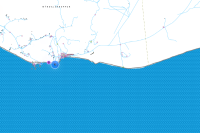

In [6]:
webmap = gis.content.get('e7f0b5566de1401ca12c4dc5bc03a3bd')
webmap

In [ ]:

save_folder:str = os.path.join(r"c:\devsummit_2025", "offline")
# create a temporary folder to store the offline package
os.makedirs(save_folder, exist_ok=True)
offline_package:str = gis.content.offline.export_items(
                        items=[webmap], 
                        output_folder=save_folder)

print(offline_package)


#### Clone to a new `GIS`

In [23]:
gis_destination = GIS(profile='your_enterprise_profile')

#### Import the Cloned Content

- All vector services are re-created and hosted on the new machine 

In [ ]:
results = gis_destination.content.offline.import_content(
    package_path=offline_package)

In [ ]:
results

[<Item title:"Fatal incidents among foreign tourists in Iceland" type:Feature Layer Collection owner:andrew>,
 <Item title:"WebMap Iceland Boundary" type:File Geodatabase owner:andrew>,
 <Item title:"Iceland Open Street Map Data" type:Shapefile owner:andrew>,
 <Item title:"WebMap Iceland Boundary" type:Feature Layer Collection owner:andrew>,
 <Item title:"Iceland Open Street Map Data" type:Feature Layer Collection owner:andrew>,
 <Item title:"Iceland Webmap" type:Web Map owner:andrew>]